In [2]:
# Data Preprocessing:
import pandas as pd
import numpy as np
import os

# Save the model:
import pickle

# To Expand the columns :
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Visualisation :
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the Data :

In [4]:
data = pd.read_csv('Data/ipl.csv')
print('Shape of the data:',data.shape)
data.head(1)

Shape of the data: (76014, 15)


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222


### Exploring the Dataset :

In [211]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total'], dtype='object')

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
mid               76014 non-null int64
date              76014 non-null object
venue             76014 non-null object
bat_team          76014 non-null object
bowl_team         76014 non-null object
batsman           76014 non-null object
bowler            76014 non-null object
runs              76014 non-null int64
wickets           76014 non-null int64
overs             76014 non-null float64
runs_last_5       76014 non-null int64
wickets_last_5    76014 non-null int64
striker           76014 non-null int64
non-striker       76014 non-null int64
total             76014 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [213]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


#### Brief Idea about Data:

In [214]:
print('Noof stadiums given:',len(data.venue.unique()), '&',data.venue.unique())
print(" ")
print("*"*10)
print('Total teams present:',len(data.bat_team.unique()))
print(" ")
print("*"*10)
print('Total Noof Players:',len(data.batsman.unique()))

Noof stadiums given: 35 & ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 '

In [215]:
# As of now Considering only consisitent teams :

consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

print('Shape of the data before removing inconsistent teams:{}'.format(data.shape))
data = data[(data.bat_team.isin(consistent_teams))&(data.bowl_team.isin(consistent_teams))]
print('Shape of the data after removing inconsistent teams:{}'.format(data.shape))

Shape of the data before removing inconsistent teams:(76014, 15)
Shape of the data after removing inconsistent teams:(53811, 15)


In [216]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(data.shape))
data = data[data['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(data.shape))

Before removing first 5 overs data: (53811, 15)
After removing first 5 overs data: (40108, 15)


In [218]:
# Check Na values :

data.isnull().sum().sort_values(ascending=False)

data = data.dropna()

In [219]:
data.head(1)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
32,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,222


### Visualisation :

Text(0.5, 1.0, 'Runs scored recent Vs last 5 Years')

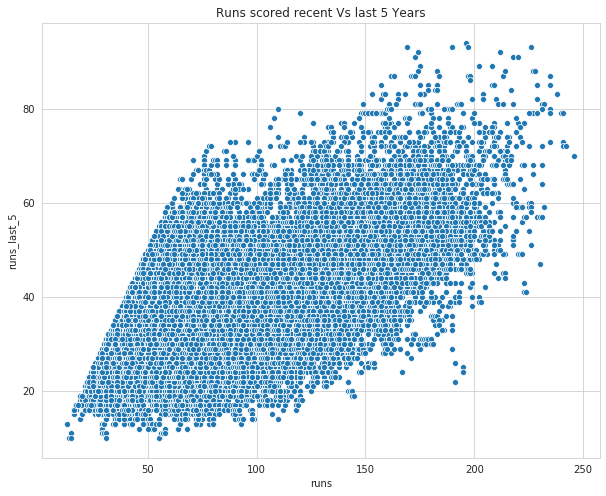

In [220]:
plt.figure(figsize = (10,8))
sns.set_style('whitegrid')
sns.scatterplot(x = data.runs,y = data.runs_last_5)
plt.title('Runs scored recent Vs last 5 Years')

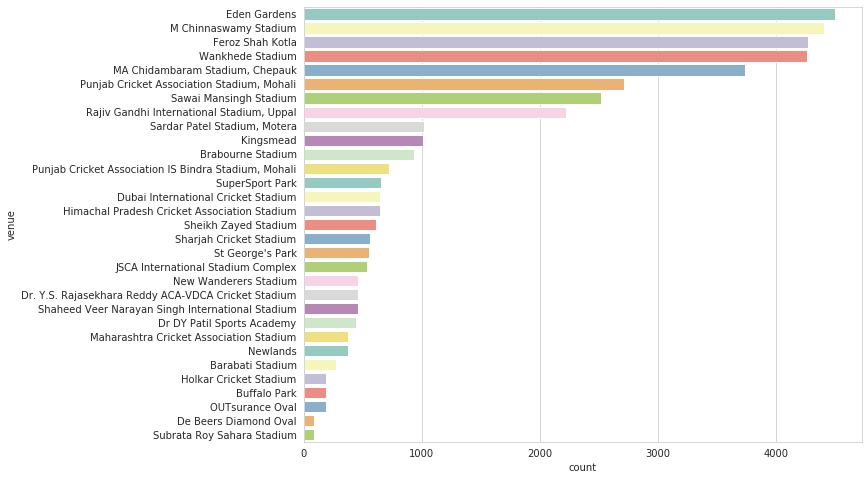

In [221]:
plt.figure(figsize = (10,8))
sns.set_style('whitegrid')
sns.countplot(y = data.venue,order = data.venue.value_counts().index,palette="Set3")


Features considered : ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker']


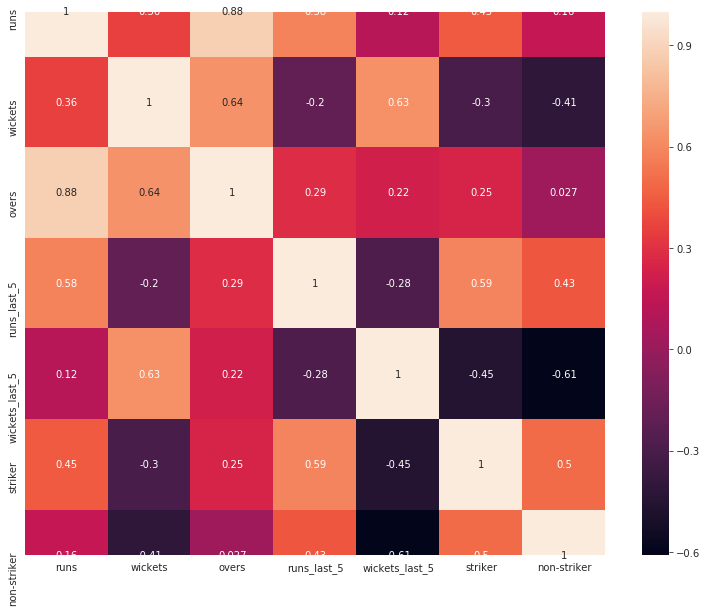

In [222]:
int_features = list(data.select_dtypes(exclude='object').columns)

int_features.remove('mid')
int_features.remove('total')
print('Features considered :',int_features)

# Get correlation of all the features of the dataset by considering only independent variables: 
corr_matrix = data[int_features].corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=data[top_corr_features].corr(), annot=True)

#1. From above plot we can see that noof runs and overs are correlated by 88%.
#Hence we can remove one features

### Data Cleaning & Preprocessing :

In [223]:
data.isnull().sum().sort_values(ascending=False)
data = data.dropna()

In [224]:
# Removing irrelevant columns :

drop_features = ['mid','striker','non-striker','batsman','bowler']
data.drop(drop_features,axis=1,inplace=True)

In [226]:
data['year'] = pd.DatetimeIndex(data['date']).year

copy_data = data.copy()


In [227]:
# Need to convert categorical data into Numerical data :

data = pd.get_dummies(data = data, columns = ['venue','bat_team','bowl_team'])

### Split the data into train & test :

In [229]:
from sklearn.model_selection import train_test_split

In [300]:
# Splitting the data into train and test :

train_data = data[data.year <= 2016]
test_data = data[data.year >= 2017]

X_train,y_train = train_data.drop(['total'],axis=1),train_data['total']
X_test,y_test = test_data.drop(['total'],axis=1),test_data['total']

#data shape
print('Shape of the train data:{}'.format(X_train.shape))
print("*"*10)
print('Shape of the test data:{}'.format(X_test.shape))

Shape of the train data:(37330, 54)
**********
Shape of the test data:(2778, 54)


In [301]:
X_train.drop(['date','year'],axis=1,inplace=True)
X_test.drop(['date','year'],axis=1,inplace=True)

### Data Modelling :

##### 1 . Random Forest :

In [302]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# from sklearn.metrics import mae,rmse

model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

# Predicting on test data :
rf_predictions = round(pd.Series(model_rf.predict(X_test)),0)

# Evaluation metrics:
rmse = sqrt(mean_squared_error(y_test,rf_predictions))
mae =  mean_absolute_error(y_test,rf_predictions)

print('Root Mean SquareError:',rmse)
print("Mean Absolute Error (MAE):",mae)


/home/venkatrao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Root Mean SquareError: 19.9429170986746
Mean Absolute Error (MAE): 15.023758099352051


#####  2 . XGboost :

In [303]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train,y_train)

# Predicting on test data:
xg_predictions = round(pd.Series(model_xg.predict(X_test)),0)

# Evaluating :

rmse = sqrt(mean_squared_error(y_test,xg_predictions))
mae =  mean_absolute_error(y_test,xg_predictions)

print('Root Mean SquareError:',rmse)
print("Mean Absolute Error (MAE):",mae)

Root Mean SquareError: 19.893850777969003
Mean Absolute Error (MAE): 15.213822894168466


##### 3.Cat Boost Regresor :

In [304]:
from catboost import CatBoostRegressor

train_data = copy_data[copy_data.year <= 2015]
validation_data = copy_data[copy_data.year == 2016]
test_data = copy_data[copy_data.year >= 2017]

X_train,y_train = train_data.drop(['total'],axis=1),train_data['total']
X_validation, y_validation = validation_data.drop(['total'],axis=1),validation_data['total']
X_test,y_test = test_data.drop(['total'],axis=1),test_data['total']

X_train.drop(['date','year'],axis=1,inplace=True)
X_validation.drop(['date','year'],axis=1,inplace=True)
X_test.drop(['date','year'],axis=1,inplace=True)


categorical_features_indices =  np.where(X_train.dtypes != np.float)[0]

model_catBoost=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1,
                        loss_function='RMSE')

model_catBoost.fit(X_train, y_train,cat_features=categorical_features_indices,
          eval_set=(X_validation,y_validation),plot=True,verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [309]:
# Predicting on test data:
catBoost_predictions = round(pd.Series(model_catBoost.predict(X_test)),0)

# Evaluating :

rmse = sqrt(mean_squared_error(y_test,catBoost_predictions))
mae =  mean_absolute_error(y_test,catBoost_predictions)

print('Root Mean SquareError:',rmse)
print("Mean Absolute Error (MAE):",mae)

Root Mean SquareError: 20.848617863317827
Mean Absolute Error (MAE): 16.336573074154067


##### 3 . Customised Ensembled method : 

Here , we combine predictions of the above models and consider the mean 

In [306]:
custom_predictions = round((rf_predictions+xg_predctions+catBoost_predictions)/3,0)

# Evaluating :

rmse = sqrt(mean_squared_error(y_test,custom_predictions))
mae =  mean_absolute_error(y_test,custom_predictions)

print('Root Mean SquareError:',rmse)
print("Mean Absolute Error (MAE):",mae)

Root Mean SquareError: 18.853161131895806
Mean Absolute Error (MAE): 14.334413246940246


From above we can observe that custom predicitons are accurate than individual models..